<a href="https://colab.research.google.com/github/fernando12170209/Machine_learning_basico/blob/master/Regresion_Lineal_conKeras/RegresionLineal_conKera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving dataset.csv to dataset.csv
    Age  Systolic blood pressure
0    39                      144
1    45                      138
2    47                      145
3    65                      162
4    46                      142
5    67                      170
6    42                      124
7    67                      158
8    56                      154
9    64                      162
10   56                      150
11   59                      140
12   34                      110
13   42                      128
14   48                      130
15   45                      135
16   17                      114
17   20                      116
18   19                      124
19   36                      136
20   50                      142
21   39                      120
22   21                      120
23   44                      160
24   53                      158
25   63                      144
26   29                      130
27   25                      125
28   69  

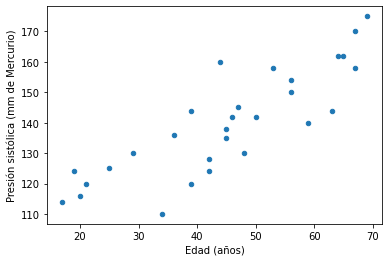

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Parámetros: w = 1.0, b = 93.5


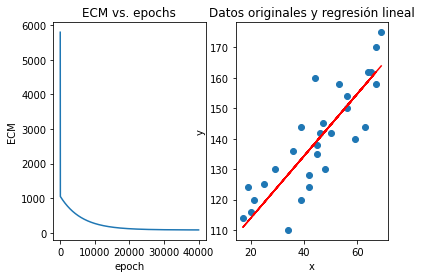

La presión sanguínea será de 185.3 mm-Hg  para una persona de 90 años


In [1]:
# Regresión lineal usando el dataset de presión sanguínea vs. edad y usando la
# librería Keras.
# Tomado de: http://people.sc.fsu.edu/~jburkardt/datasets/regression/regression.html
# 
# codificandobits.com - 2018

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

#
# Lectura y visualización del set de datos
#
#Para cargar los archivos desde la plataforma, ver archivo en github

from google.colab import files
file = files.upload()
#

datos = pd.read_csv('dataset.csv', sep=",", skiprows=32, usecols=[2,3])
print(datos)

# Al graficar los datos se observa una tendencia lineal
datos.plot.scatter(x='Age', y='Systolic blood pressure')
plt.xlabel('Edad (años)')
plt.ylabel('Presión sistólica (mm de Mercurio)')
plt.show()

x = datos['Age'].values
y = datos['Systolic blood pressure'].values

#
# Construir el modelo en Keras
#

# - Capa de entrada (input_dim): 1 dato (cada dato "x" correspondiente a la edad)
# - Capa de salida (output_dim): 1 dato (cada dato "y" correspondiente a la regresión lineal)
# - Función de Activación: 'linear' (pues se está implementando la regresión lineal)

np.random.seed(2)			# Para reproducibilidad del entrenamiento definimos una semilla fija seed(2)

input_dim = 1
output_dim = 1
#Definimos el objeto modelo
modelo = Sequential()
#Luego modelo adquiere las propiedades para ejecutar una tarea(regresion lineal, red neuraonal o red convulosional entre otros)
modelo.add(Dense(output_dim, input_dim=input_dim, activation='linear'))

# Definición del método de optimización (gradiente descendiente), con una
# tasa de aprendizaje de 0.0004 y una pérdida igual al error cuadrático medio
# mse=medium square error

#la funcion de coste o perdida(loss)="mse", tipica para la regresion lineal

#Optimizador:Gradiente descendiente (SGD) con lr=0.0004 (learning rate)
sgd = SGD(lr=0.0004)
#agregamos el optimizados al modelo con la funcion compile
modelo.compile(loss='mse', optimizer=sgd)

# Imprimir en pantalla la información del modelo
modelo.summary()

#
# Entrenamiento: realizar la regresión lineal
#

# 40000 iteraciones y todos los datos de entrenamiento (29) se usarán en cada
# iteración (batch_size = 29)

num_epochs = 40000
batch_size = x.shape[0]
#verbose:Permite imprimir en pantalla cada una de las iteraciones(num_epochs)
#cuando verbose=0, no se imprime en pantalla
history = modelo.fit(x, y, epochs=num_epochs, batch_size=batch_size, verbose=0)

#
# Visualizar resultados del entrenamiento
#

# Imprimir los coeficientes "w" y "b"
capas = modelo.layers[0]
w, b = capas.get_weights()
print('Parámetros: w = {:.1f}, b = {:.1f}'.format(w[0][0],b[0]))

# Graficar el error vs epochs y el resultado de la regresión
# superpuesto a los datos originales
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('ECM')
plt.title('ECM vs. epochs')

y_regr = modelo.predict(x)
plt.subplot(1, 2, 2)
plt.scatter(x,y)
plt.plot(x,y_regr,'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos originales y regresión lineal')
plt.show()

# Predicción
x_pred = np.array([90])
y_pred = modelo.predict(x_pred)
print("La presión sanguínea será de {:.1f} mm-Hg".format(y_pred[0][0]), " para una persona de {} años".format(x_pred[0]))